# 获取历史数据

In [2]:
get_price("000001.XSHE", start_date='20180101', end_date='20181001', frequency='1d').head()

,close,high,limit_down,limit_up,low,open,total_turnover,volume
date,,,,,,,,
2018-01-02,13.4877,13.7142,11.7846,14.4033,13.1136,13.1432,2.856544e+09,208159255.0
2018-01-03,13.1235,13.6453,12.1390,14.8365,12.9955,13.5173,4.006221e+09,296249838.0
2018-01-04,13.0447,13.1629,11.8141,14.4329,12.9266,13.1136,2.454544e+09,185450948.0
2018-01-05,13.0939,13.1432,11.7452,14.3541,12.9463,13.0053,1.603290e+09,121031272.0
2018-01-08,12.7592,13.0841,11.7846,14.4033,12.6608,13.0447,2.806099e+09,215862081.0


- 获取交易日列表

In [5]:
get_trading_dates(start_date='20180101', end_date='20181001')

[datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 5),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 12),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 22),
 datetime.date(2018, 2, 23),
 datetime.date(2018, 2, 26)

- 查询财务数据

In [21]:
q = query(fundamentals.eod_derivative_indicator.market_cap)
data = get_fundamentals(q, entry_date='20180102', interval='1d')

In [22]:
data.shape

(1, 1, 3468)

In [23]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 1 (major_axis) x 3468 (minor_axis)
Items axis: market_cap to market_cap
Major_axis axis: 2018-01-02 00:00:00 to 2018-01-02 00:00:00
Minor_axis axis: 002893.XSHE to 600054.XSHG

In [25]:
data[:,'20180102', :].head()

,market_cap
002893.XSHE,3.3468e+09
600977.XSHG,2.91065e+10
002074.XSHE,2.51086e+10
002184.XSHE,2.95751e+09
603042.XSHG,4.07135e+09


In [60]:
fector = get_fundamentals(query(fundamentals.eod_derivative_indicator.pe_ratio), entry_date='20180103')[:,"20180103", :]

In [62]:
fector.head()

,pe_ratio
601211.XSHG,16.9137
002705.XSHE,25.5779
300531.XSHE,92.4438
300363.XSHE,52.8478
600977.XSHG,30.1147


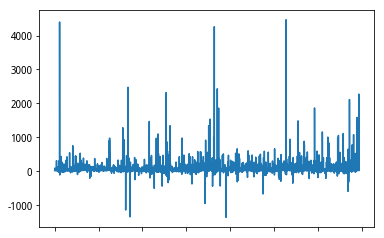

In [64]:
fector['pe_ratio'].plot()

In [65]:
from scipy.stats.mstats import winsorize

In [66]:
fector['pe_ratio1'] = winsorize(fector['pe_ratio'], limits=0.025)

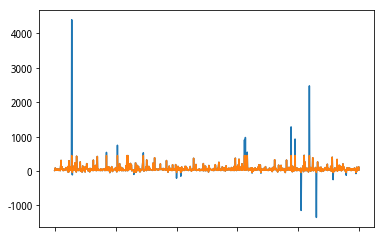

In [67]:
fector['pe_ratio'][:1000].plot()
fector['pe_ratio1'][:1000].plot()

- 自实现分位数去极值

In [68]:
import numpy as np

def quantile(factor, up, down):
    up_scale = np.percentile(factor, up)
    down_scale = np.percentile(factor, down)
    
    factor = np.where(factor > up_scale, up_scale, factor)
    factor = np.where(factor < down_scale, down_scale, factor)
    return factor

In [71]:
fector['pe_ratio2'] = quantile(fector['pe_ratio'], 97.5, 2.5)

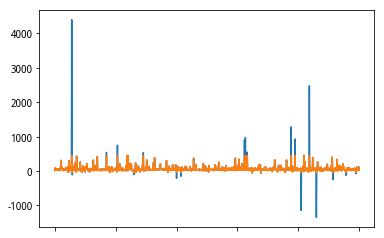

In [72]:
fector['pe_ratio'][:1000].plot()
fector['pe_ratio2'][:1000].plot()

- 中位数去极值

In [82]:
def mad(factor):
    # 求出因子的中位数
    med = np.median(factor)
    
    # 求出mad = medina(\x - mea\)    (x为没一个元素的值)
    mad = np.median(abs(factor - med))
    
    up = med + (3 * 1.4826 * mad)
    down = med - (3 * 1.4826 * mad)
    
    factor = np.where(factor > up, up, factor)
    factor = np.where(factor < down, down, factor)
    
    return factor

In [83]:
fector['pe_ratio3'] = mad(fector['pe_ratio'])

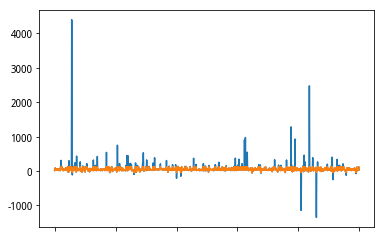

In [84]:
fector['pe_ratio'][:1000].plot()
fector['pe_ratio3'][:1000].plot()

- 正态分布去极值

In [85]:
def three_sigma(factor):
    
    # 求出因子数据的平均值和标准差
    mean = factor.mean()
    std = factor.std()
    
    # 左右的数据加减3个标准差
    high = mean + (3 * std)
    low = mean - (3 * std)
    
    # 替换
    factor = np.where(factor > high, high, factor)
    factor = np.where(factor < low, low, factor)
    
    return factor

In [86]:
fector['pe_ratio4'] = three_sigma(fector['pe_ratio'])

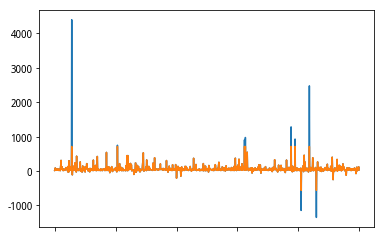

In [87]:
fector['pe_ratio'][:1000].plot()
fector['pe_ratio4'][:1000].plot()

- 因子数据处理-标准化

In [88]:
from sklearn.linear_model import LinearRegression

- 去极值和标准化完全是两个东西。
- 去极值是把数据脏数据拉回来。
- 标准化则是把数据拉到同一纬度来

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
std = StandardScaler()

In [99]:
fector['pe_ratio5'] = std.fit_transform(fector['pe_ratio'])

/opt/conda/envs/ricequant/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


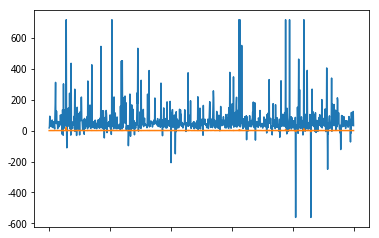

In [94]:
fector['pe_ratio4'][:1000].plot()
fector['pe_ratio5'][:1000].plot()

- 自实现标准化

In [95]:
def stand(factor):
    mean = factor.mean()
    
    std = factor.std()
    
    return (factor - mean)/std

In [103]:
fector['pe_ratio6'] = stand(fector['pe_ratio2'])

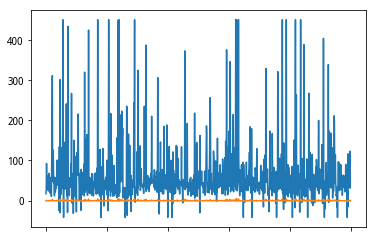

In [104]:
fector['pe_ratio2'][:1000].plot()
fector['pe_ratio6'][:1000].plot()

In [105]:
q = query(fundamentals.eod_derivative_indicator.pb_ratio,
         fundamentals.eod_derivative_indicator.market_cap)

In [117]:
factor = get_fundamentals(q, entry_date="2018-01-03")[:,"20180103", :]

In [118]:
factor['pb_ratio'] = mad(factor['pb_ratio'])
factor['pb_ratio'] = stand(factor['pb_ratio'])

In [119]:
x = factor['market_cap'].reshape(-1, 1)
y = factor['pb_ratio']

AttributeError: 'Series' object has no attribute 'reshape'

In [112]:
x.shape

(3469,)

In [113]:
y.shape

(3469,)

In [114]:
x = x.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'